In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
bright, ans, conf = [], [], []
for line in data.splitlines():
    bright.append(int(line.split('"')[1]))
    ans.append(line.split('"')[3])
    conf.append(int(line.split('"')[5]))
    
df = pd.DataFrame()
df['brightness'] = bright
df['answer'] = ans
df['confidence'] = conf
df.head()

,brightness,answer,confidence
0,30,Present,6
1,70,Present,8
2,60,Present,7
3,10,Not Present,1
4,50,Present,8


In [28]:
df.to_csv('KBY_2022_Dec_1_sess_data.csv')

In [2]:
df = pd.read_csv('KBY_2022_Dec_1_sess_data.csv')
df.head()

,Unnamed: 0,brightness,answer,confidence
0,0,30,Present,6
1,1,70,Present,8
2,2,60,Present,7
3,3,10,Not Present,1
4,4,50,Present,8


In [ ]:
trial = []
for index, row in df.iterrows():
    if row['brightness'] > 45: trial.append('Present')
    elif row['brightness'] < 45: trial.append('Not Present')
df['trial'] = trial
df.head()

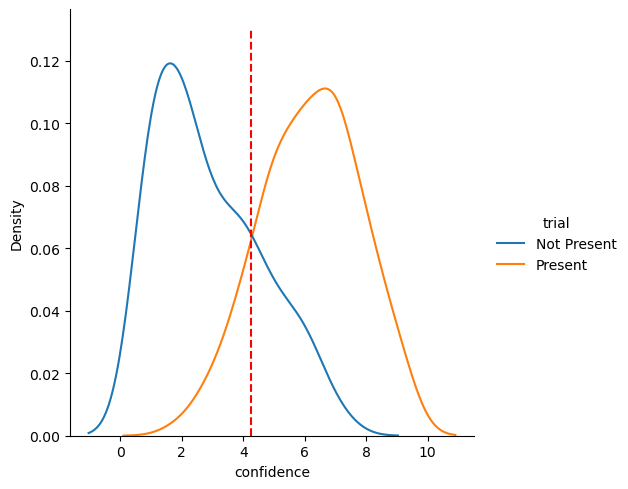

In [13]:
sns.displot(df, x = 'confidence', hue = 'trial', kind = 'kde')
plt.plot([4.25, 4.25], [0, 0.13], 'r--', label = 'Criterion')
plt.show()

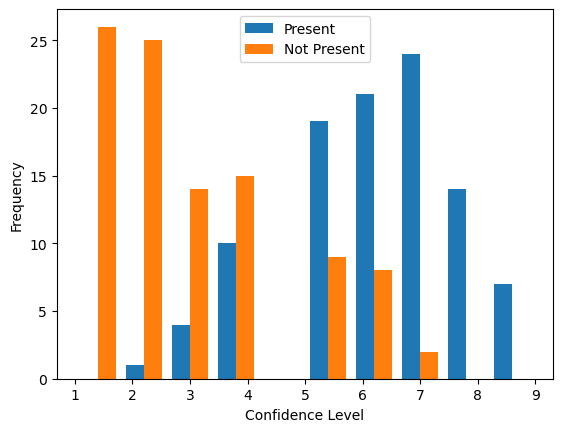

In [14]:
x = [df[df.trial == 'Present']['confidence'], df[df.trial == 'Not Present']['confidence']]

fig, ax = plt.subplots()
ax.hist(x, label = ['Present', 'Not Present'])
plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [54]:
res55 = []
for index, row in df.iterrows():
    if row['brightness'] > 55 and row['answer'] == 'Present': res55.append(1)
    elif row['brightness'] < 55 and row['answer'] == 'Not Present': res55.append(1)
    else: res55.append(0)
df['result55'] = res55
df.head()

,Unnamed: 0,brightness,answer,confidence,trial,result55
0,0,30,Present,6,Not Present,0
1,1,70,Present,8,Present,1
2,2,60,Present,7,Present,1
3,3,10,Not Present,1,Not Present,1
4,4,50,Present,8,Present,0


In [55]:
sum(df[df.brightness > 55].result55)

62

In [66]:
sum(df[df.brightness < 45].result55)

87

In [20]:
len(df[df.trial == 'Present'][df.answer == df.trial])

/tmp/ipykernel_3622/3417218208.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df.trial == 'Present'][df.answer == df.trial])


71

# ROC Curve

In [35]:
hit_rate, false_alarms = [], []
for i in np.linspace(1, 9, 500):
    hit_rate.append(len(df[df.trial == 'Present'][df.confidence >= i]))
    false_alarms.append(len(df[df.trial == 'Not Present'][df.confidence >= i]))

/tmp/ipykernel_3622/791117594.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hit_rate.append(len(df[df.trial == 'Present'][df.confidence >= i]))
/tmp/ipykernel_3622/791117594.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_alarms.append(len(df[df.trial == 'Not Present'][df.confidence >= i]))


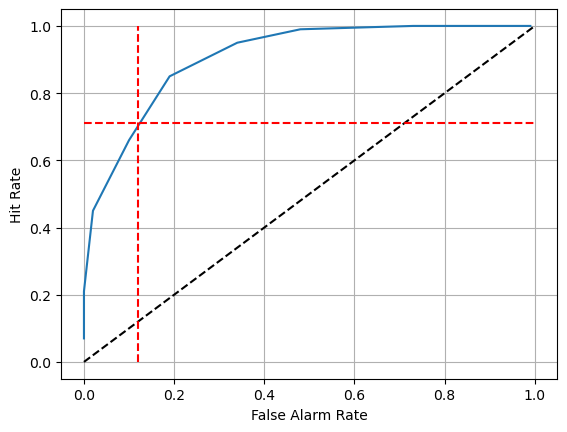

In [36]:
plt.plot(np.array(false_alarms)/100, np.array(hit_rate)/100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([.12, .12], [0, 1], 'r--')
plt.plot([0, 1], [.71, .71], 'r--')
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.grid()
plt.show()

In [85]:
# Slopes
slopes = []
for i in range(len(hit_rate)-1):
    try:
        slopes.append( (false_alarms[i+1]-false_alarms[i])/(hit_rate[i+1]-hit_rate[i]) )
    except:
        slopes.append(0) # for when dividing by 0

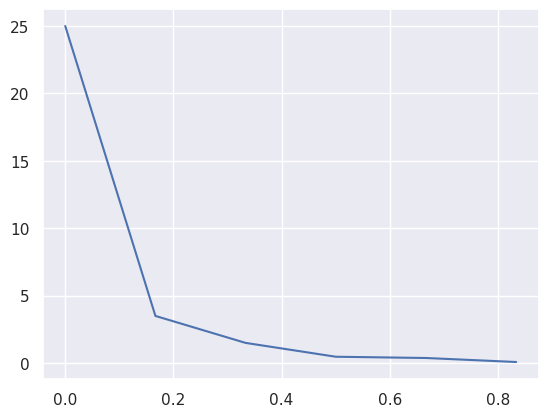

In [90]:
slopes = [i for i in slopes if i != 0]
plt.plot(np.array(range(6))/6, slopes)
plt.show()

In [92]:
# Area under the curve
area = 0
for i in range(len(hit_rate)-1):
    area += (false_alarms[i+1]/100 - false_alarms[i]/100) * (hit_rate[i+1]/100-hit_rate[i]/100)
area

0.0618

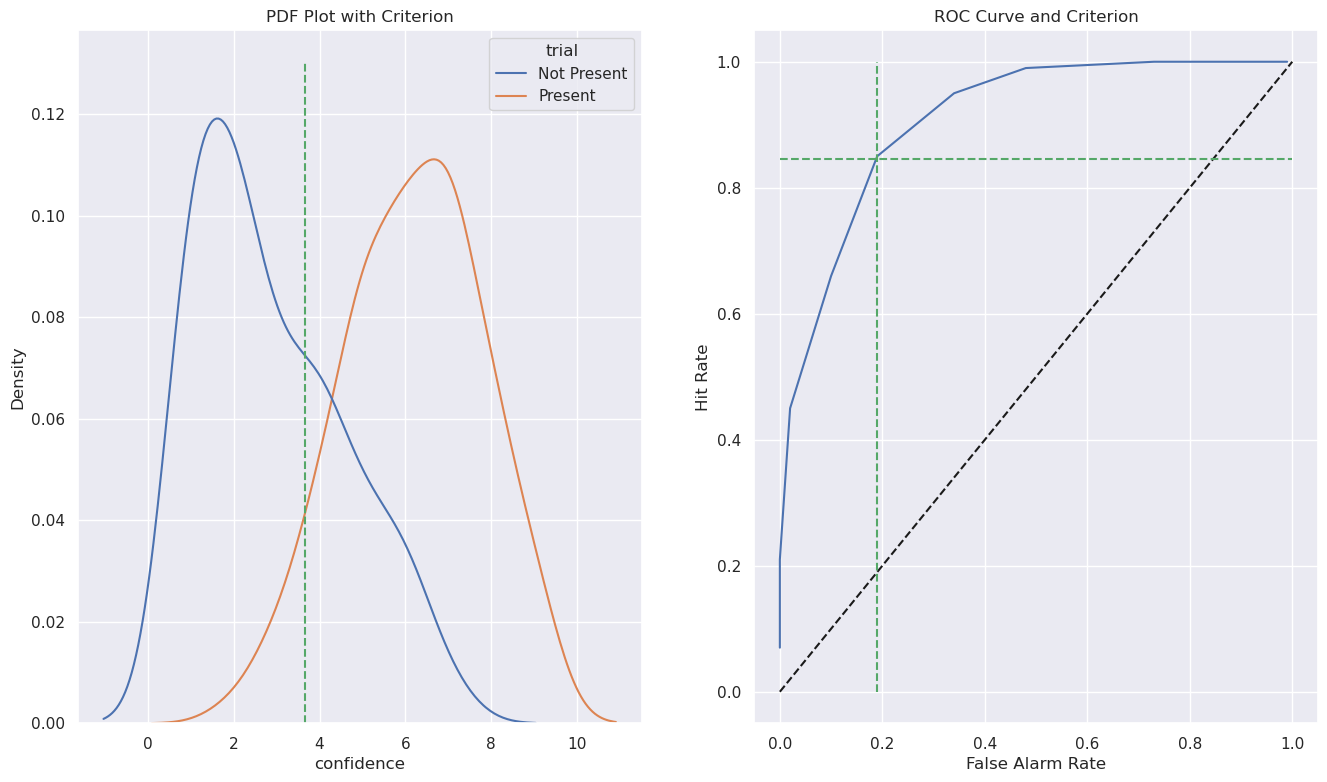

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(16,9))
sns.set()

axs[0].set_title('PDF Plot with Criterion')
sns.kdeplot(data = df, x = 'confidence', hue = 'trial', ax = axs[0])
axs[0].plot([3.65, 3.65], [0, 0.13], 'g--', label = 'Criterion')

axs[1].set_title('ROC Curve and Criterion')
axs[1].plot(np.array(false_alarms)/100, np.array(hit_rate)/100)
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].plot([.19, .19], [0, 1], 'g--')
axs[1].plot([0, 1], [.845, .845], 'g--')
axs[1].set_xlabel('False Alarm Rate')
axs[1].set_ylabel('Hit Rate')

plt.show()

# Mean Difference (d prime)

In [32]:
df[df.trial == 'Present'].confidence.mean() - df[df.trial == 'Not Present'].confidence.mean()

3.301212121212121

In [81]:
(df[df.trial == 'Present'].confidence.std() + df[df.trial == 'Not Present'].confidence.std()) / 2

1.6447461340171223

In [83]:
3.30 / 1.64

2.0121951219512195